In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes do robô
r = 0.1
d = 0.4
a = 0.1




1 Realize a leitura do arquivo de dados wRwL.txt, o qual possui 400 linhas e 3 colunas. Em outras palavras, o arquivo contém 400 medidas de tempo, velocidade da roda direita ωR
 e velocidade da roda esquerda ωL


In [ ]:
# Leitura dos dados do arquivo
dados = np.loadtxt("wRwL.txt")
tempo = dados[:, 0]
wR = dados[:, 1]
wL = dados[:, 2]





2 Para demonstrar a evolução temporal das velocidades das rodas, plote os gráficos que relaciona o tempo x ωR
  e o tempo x ωL
.

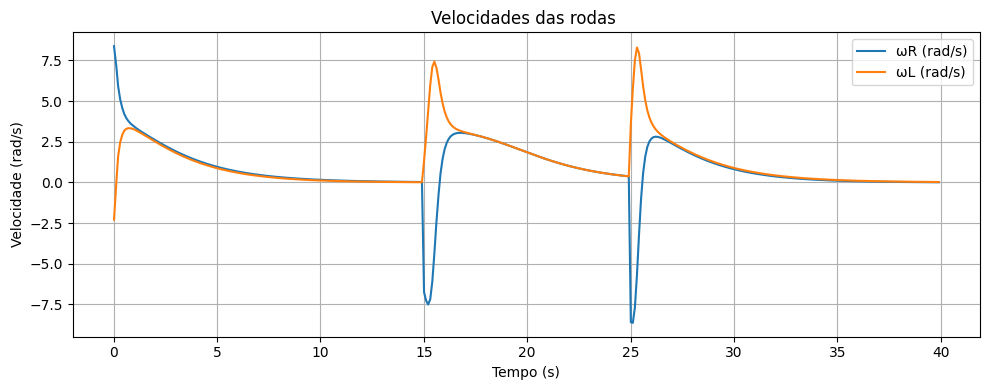

In [ ]:

plt.figure(figsize=(10, 4))
plt.plot(tempo, wR, label='ωR (rad/s)')
plt.plot(tempo, wL, label='ωL (rad/s)')
plt.title('Velocidades das rodas ')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rad/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



3 Transforme as velocidades ωR
 e ωL
 em sinalis de controle u
 e ω
.

In [ ]:

u = r * (wR + wL) / 2
w = r * (wR - wL) / d



4 Para demonstrar a evolução temporal dos sinais de controle do robô, plote os gráficos que relaciona o tempo x u
  e o tempo x ω
.

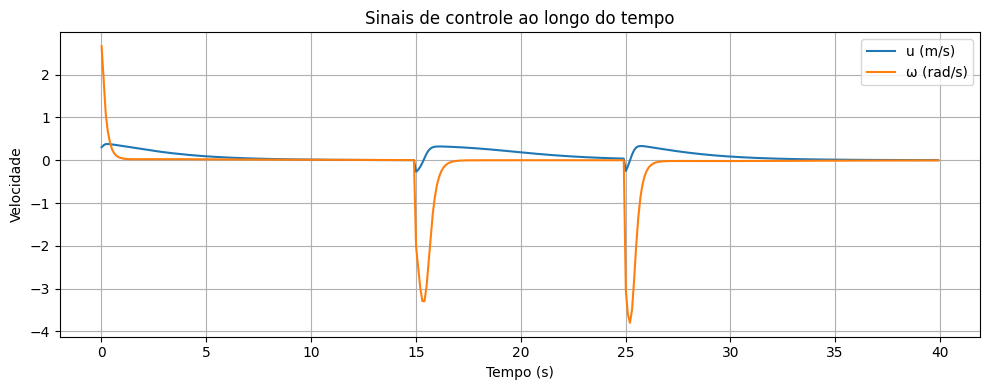

In [ ]:

plt.figure(figsize=(10, 4))
plt.plot(tempo, u, label='u (m/s)')
plt.plot(tempo, w, label='ω (rad/s)')
plt.title('Sinais de controle ao longo do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



5 Use o modelo cinemático, para determinar a posição e orientação do robô ao longo do tempo. A título de exemplo, para determinar a orientação do robô, faça ψ˙(k)=ψ(k)−ψ(k−1)Δt=ω
, ou ainda ψ(k)=ψ(k−1)+ωΔt
.

In [ ]:

x = np.zeros(len(tempo))
y = np.zeros(len(tempo))
psi = np.zeros(len(tempo))

for k in range(1, len(tempo)):
    dt = tempo[k] - tempo[k-1]
    psi[k] = psi[k-1] + w[k] * dt

    matriz_transformacao =np.array([[np.cos(psi[k]), -a*np.sin(psi[k])],
                                    [np.sin(psi[k]), a*np.cos(psi[k])]])
    velocidades  = np.array([u[k],w[k]])
    posicao_anterior  = [x[k-1],y[k-1]]

    x[k] , y[k] = posicao_anterior + matriz_transformacao @ velocidades * dt




6 Para demonstrar a evolução temporal da posição e orientação do robô, plote os gráficos que relaciona o tempo x x
  e o tempo x y
, o tempo x ψ
.

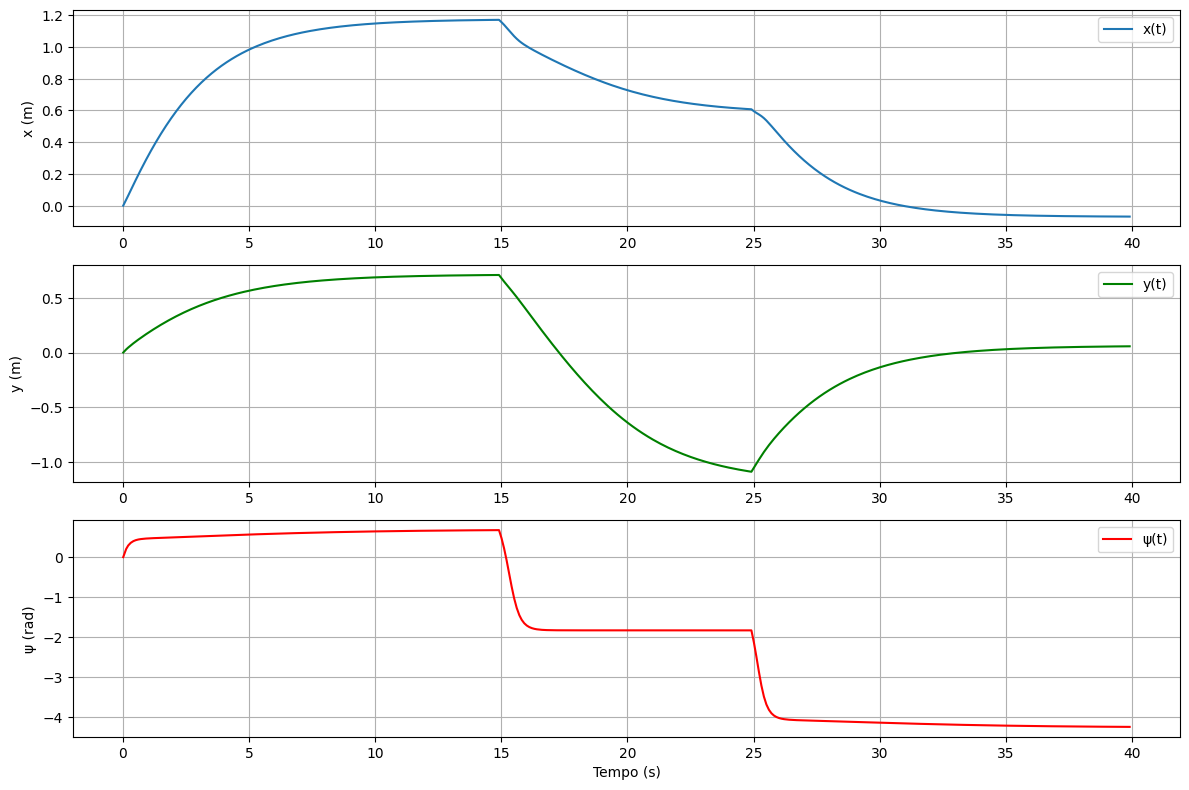

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(tempo, x, label='x(t)')
plt.ylabel('x (m)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(tempo, y, label='y(t)', color='green')
plt.ylabel('y (m)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(tempo, psi, label='ψ(t)', color='red')
plt.xlabel('Tempo (s)')
plt.ylabel('ψ (rad)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



7 Para demonstrar a navegação do robô no plano cartesiano, plote o gráfico que relaciona x
 e y
.

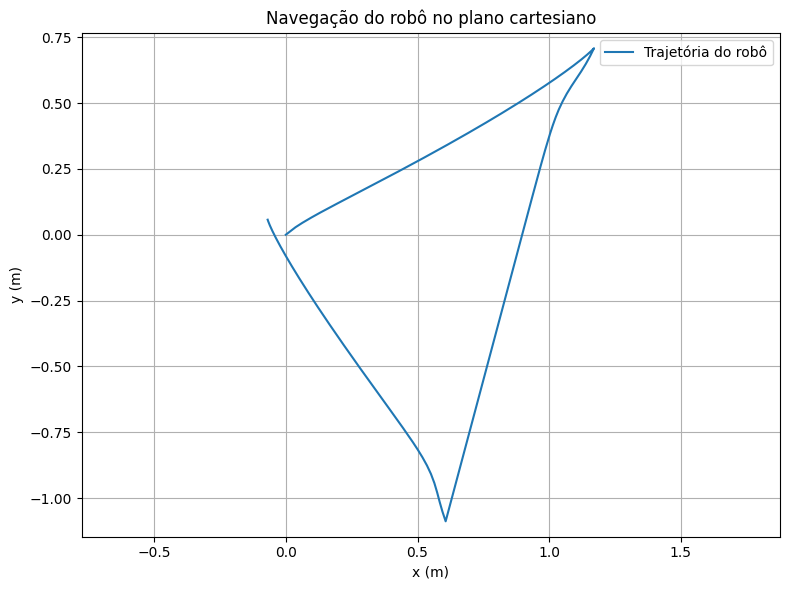

In [ ]:
# Passo 6: Trajetória no plano cartesiano
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Trajetória do robô')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Navegação do robô no plano cartesiano')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Passo 7: Posição final
posicao_final = (x[-1], y[-1], psi[-1])
posicao_final

(np.float64(-0.06891609187634962),
 np.float64(0.05705770740595484),
 np.float64(-4.2458563199999935))